<h1 align='center'>Polynomial Fitting</h1>

### This demo shows how an n-th order polynomial can be used to generate a smooth trajectory using initial and final system constraints over given period of time.

In [4]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

In [5]:
t0, t, tf = sp.symbols('t_0, t, t_f')
a0, a1, a2, a3, a4, a5 = sp.symbols('a_0, a_1, a_2, a_3, a_4, a_5')
q0, v0, qf, vf, alpha0, alphaf = sp.symbols('q_0, v_0, q_f, v_f, \\alpha_0, \\alpha_f')

### Here we choose 6th order (degree 5) polynomial to define 6 constraints. In which first 3 are over initial position, velocity and acceleration and later 3 are over final position, velocity and acceleration

In [6]:
q0 = a0 + a1*t0 + a2*t0**2 + a3*t0**3 + a4*t0**4 + a5*t0**5
display(q0)
v0 = sp.diff(q0, t0)
display(v0)
alpha0 = sp.diff(v0, t0,)
display(alpha0)
qf = a0 + a1*tf + a2*tf**2 + a3*tf**3 + a4*tf**4 + a5*tf**5
display(qf)
vf = sp.diff(qf, tf)
display(vf)
alphaf = sp.diff(vf, tf)
display(alphaf)

a_0 + a_1*t_0 + a_2*t_0**2 + a_3*t_0**3 + a_4*t_0**4 + a_5*t_0**5

a_1 + 2*a_2*t_0 + 3*a_3*t_0**2 + 4*a_4*t_0**3 + 5*a_5*t_0**4

2*a_2 + 6*a_3*t_0 + 12*a_4*t_0**2 + 20*a_5*t_0**3

a_0 + a_1*t_f + a_2*t_f**2 + a_3*t_f**3 + a_4*t_f**4 + a_5*t_f**5

a_1 + 2*a_2*t_f + 3*a_3*t_f**2 + 4*a_4*t_f**3 + 5*a_5*t_f**4

2*a_2 + 6*a_3*t_f + 12*a_4*t_f**2 + 20*a_5*t_f**3

### Using above equations we create a matrix and multiply it's inverse with the constraint vector to get all the coefficient values at given time.

#### We define constraints such that 
- Initial position of vehicle is 2
- Initially the vehicle is at stand still i.e velocity and acceleration is 0
- Final position of vehicle should be 10
- And at that position vehicle should stop i.e. final velocity and acceleration should be 0

In [7]:
# Constraints
q0 = 2
v0 = 0
alpha0 = 0
qf = 10
vf = 0
alphaf = 0

M = sp.Matrix([[1, t0, t0**2,   t0**3,    t0**4,    t0**5],
               [0,  1,  2*t0, 3*t0**2,  4*t0**3,  5*t0**4],
               [0,  0,     2,    6*t0, 12*t0**2, 20*t0**3],
               [1, tf, tf**2,   tf**3,    tf**4,    tf**5],
               [0,  1,  2*tf, 3*tf**2,  4*tf**3,  5*tf**4],
               [0,  0,     2,    6*tf, 12*tf**2, 20*tf**3]])
b = sp.Matrix([[q0], [v0], [alpha0], [qf], [vf], [alphaf]])

a = M.inv() @ b

In [8]:
q     =   a[0] +   a[1]*t +    a[2]*t**2 +    a[3]*t**3 +   a[4]*t**4 + a[5]*t**5
v     =   a[1] + 2*a[2]*t +  3*a[3]*t**2 +  4*a[4]*t**3 + 5*a[5]*t**4
alpha = 2*a[2] + 6*a[3]*t + 12*a[4]*t**2 + 20*a[5]*t**3

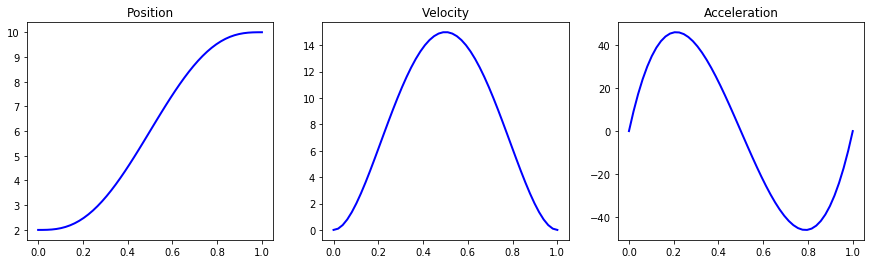

In [9]:
# Time limits
startTime = 0
stopTime = 1

qd = list()
vd = list()
alphad = list()
i_d = np.linspace(0, 1, 50)
for i in i_d:
    qd.append(q.subs([(t0, startTime), (t, i), (tf, stopTime)]))
    vd.append(v.subs([(t0, startTime), (t, i), (tf, stopTime)]))
    alphad.append(alpha.subs([(t0, startTime), (t, i), (tf, stopTime)]))

fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].set(title="Position")
axs[0].plot(i_d[:], qd[:], 'b', lw=2)

axs[1].set(title="Velocity")
axs[1].plot(i_d[:], vd[:], 'b', lw=2)

axs[2].set(title="Acceleration")
axs[2].plot(i_d[:], alphad[:], 'b', lw=2)
plt.show()